Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [142]:
df2=pd.read_csv("/content/drive/MyDrive/Great Learning/Predictive Modeling/Project/Holiday_Package.csv")

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [143]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [144]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [145]:
df2.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [146]:
df2.shape

(872, 8)

In [147]:
df2.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [148]:
df2.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [149]:
df2.drop(["Unnamed: 0"],axis=1,inplace=True)

In [150]:
df2.duplicated().sum()

0

In [151]:
df2.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [152]:
df2.shape

(872, 7)

Univariate Analysis

In [153]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df2[column], kde=True);
    plt.title("Distribution of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df2[column], orient = "v")
    plt.title("Boxplot of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("Histogram of " + column)
    print("----------------------------------------------------------------------------")
    ax1 = plt.hist(x=df2[column])
    plt.title("Histogram of " + column,fontsize=10)
    plt.xlabel("" + column, fontsize=10)
    plt.show()

In [154]:
df2_num = df2.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns2 = list(df2_num.columns.values)
len(lstnumericcolumns2)

5

In [155]:
df2_num.head()

,Salary,age,educ,no_young_children,no_older_children
0,48412,30,8,1,1
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,2,0
4,66734,44,12,0,2


In [156]:
df2.skew(axis = 0, skipna = True).sort_values(ascending=False)

Salary               3.103216
no_young_children    1.946515
no_older_children    0.953951
age                  0.146412
educ                -0.045501
dtype: float64

Description of Salary
----------------------------------------------------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64 Distribution of Salary
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


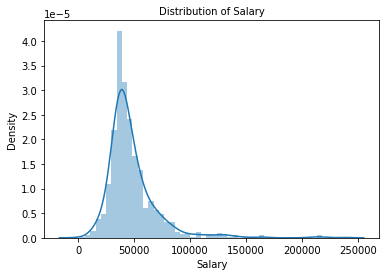

BoxPlot of Salary
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


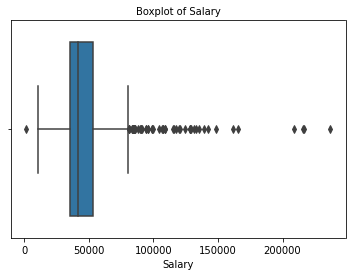

Histogram of Salary
----------------------------------------------------------------------------


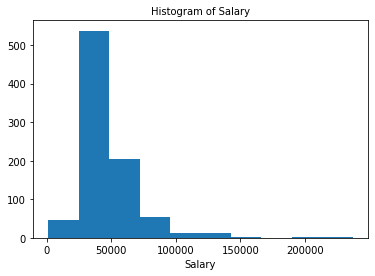

Description of age
----------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


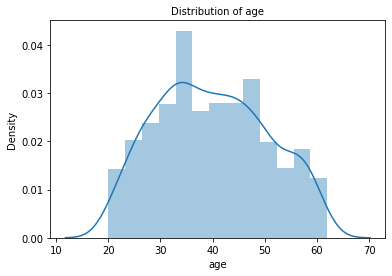

BoxPlot of age
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


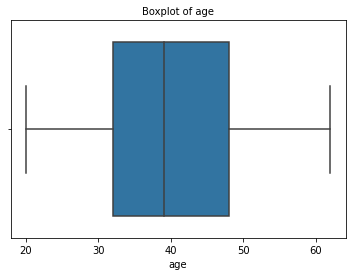

Histogram of age
----------------------------------------------------------------------------


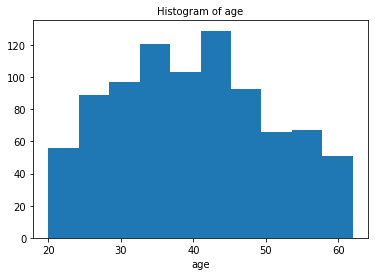

Description of educ
----------------------------------------------------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64 Distribution of educ
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


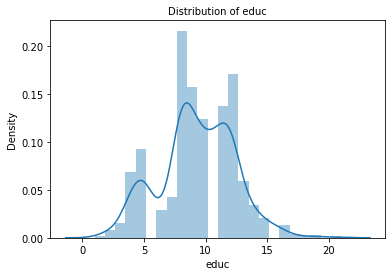

BoxPlot of educ
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


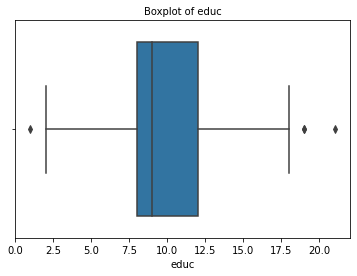

Histogram of educ
----------------------------------------------------------------------------


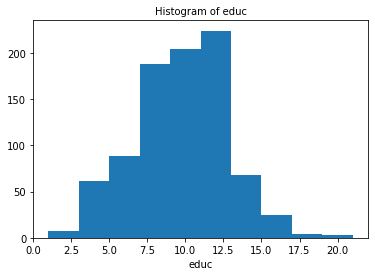

Description of no_young_children
----------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64 Distribution of no_young_children
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


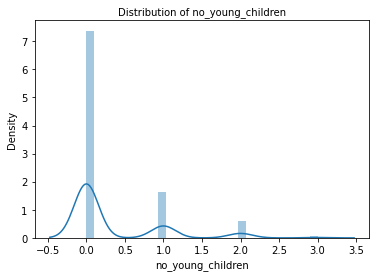

BoxPlot of no_young_children
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


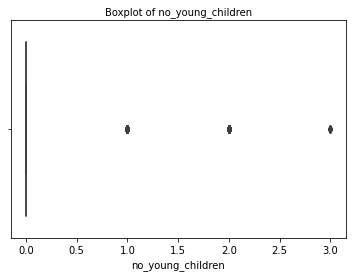

Histogram of no_young_children
----------------------------------------------------------------------------


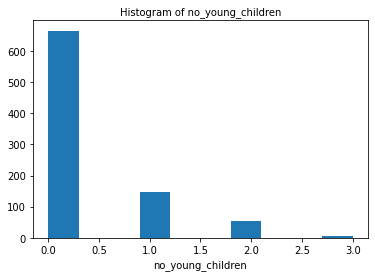

Description of no_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64 Distribution of no_older_children
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


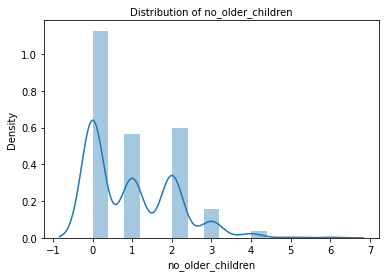

BoxPlot of no_older_children
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


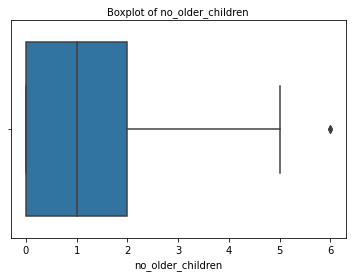

Histogram of no_older_children
----------------------------------------------------------------------------


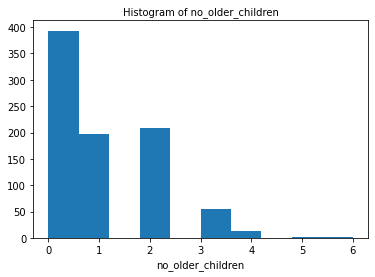

In [157]:
for x in lstnumericcolumns2:
    univariateAnalysis_numeric(x,5)

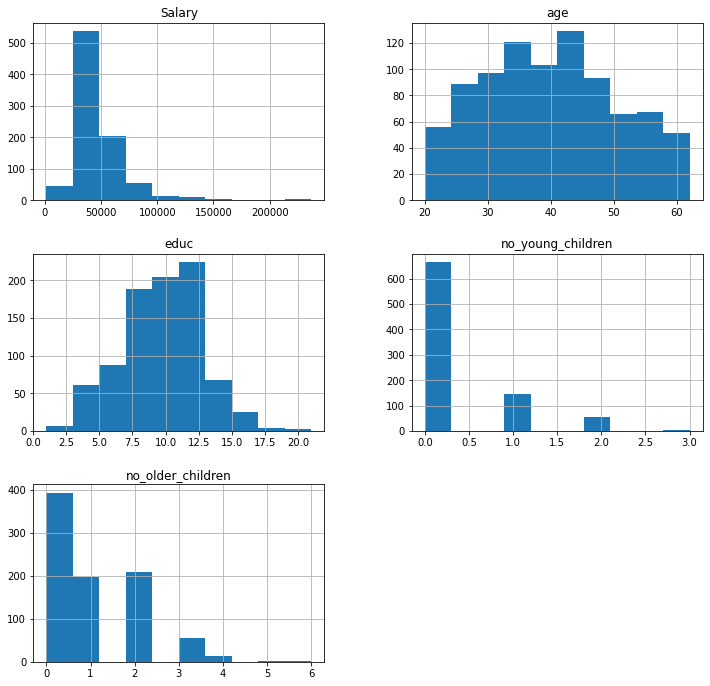

In [158]:
df2.hist(figsize=(12,16),layout=(4,2));

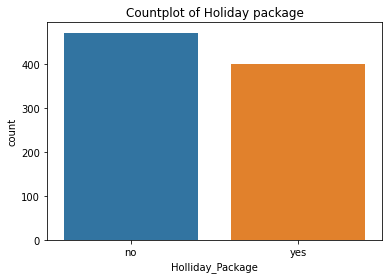

In [159]:
plt.title('Countplot of Holiday package')
sns.countplot(data = df2, x = 'Holliday_Package')

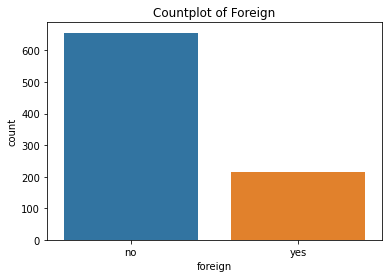

In [160]:
plt.title('Countplot of Foreign')
sns.countplot(data = df2, x = 'foreign')

Bivariate Analysis

In [161]:
corr2 = df2_num.corr(method='pearson')
corr2

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


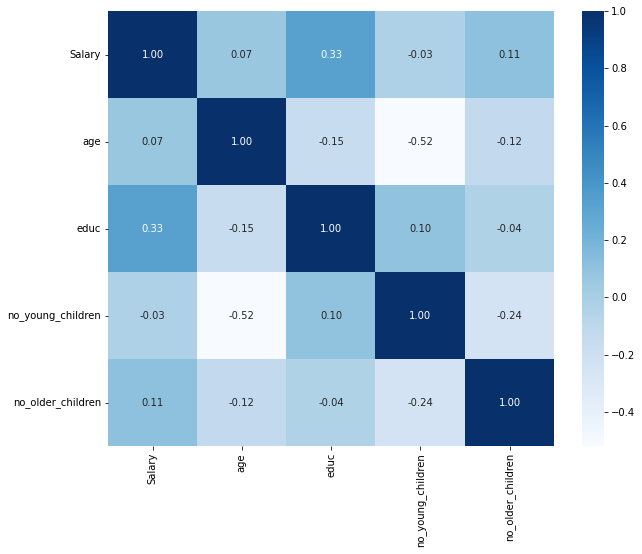

In [162]:
plt.figure(figsize=(10,8))
sns.heatmap(corr2, annot=True, fmt = '.2f', cmap = 'Blues')

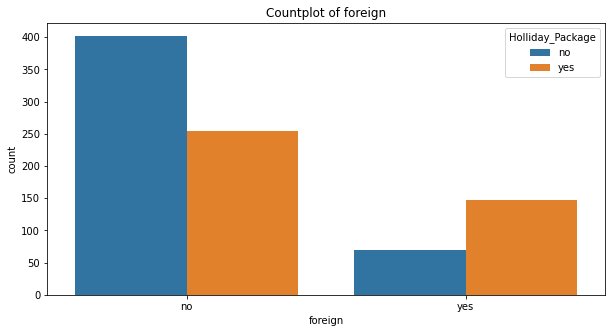

In [163]:
plt.figure(figsize=(10,5))
plt.title('Countplot of foreign')
sns.countplot(x='foreign',hue='Holliday_Package',data=df2)

Multivariate Analysis

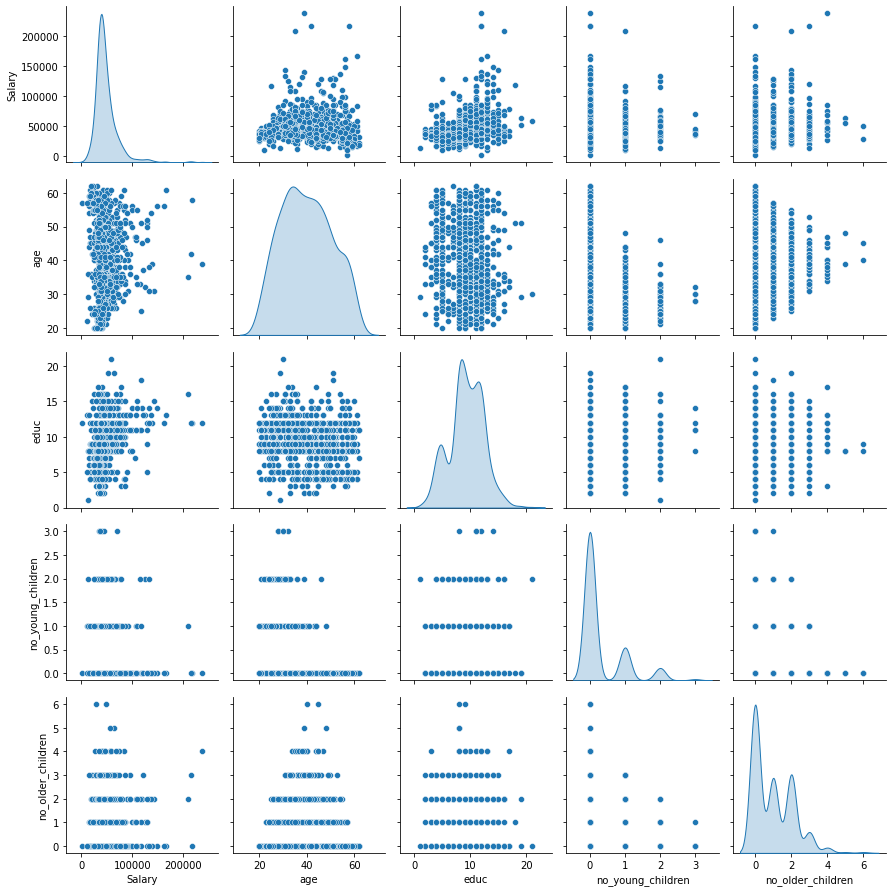

In [164]:
sns.pairplot(df2, diag_kind='kde')
plt.tight_layout()

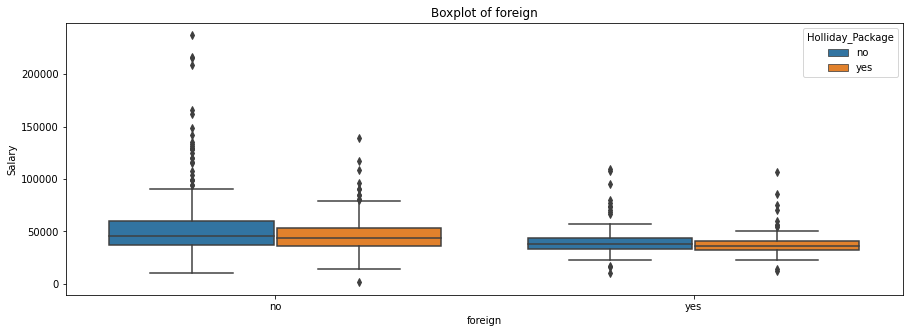

In [165]:
plt.figure(figsize=(15,5))
plt.title('Boxplot of foreign')
sns.boxplot(data = df2, x='foreign',y='Salary', hue='Holliday_Package')

2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [166]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print(feature)
        print(df2[feature].value_counts())
        print('\n')
        

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [167]:
count_no = len(df2[df2['Holliday_Package']=='no'])
count_yes = len(df2[df2['Holliday_Package']=='yes'])
pct_no = count_no / (count_no + count_yes)
print ('Percentage of employees who have not opted for the Holiday Package is', pct_no*100)
pct_yes = count_yes / (count_no + count_yes)
print ('Percentage of employees who have opted for the Holiday Package is', pct_yes*100)

Percentage of employees who have not opted for the Holiday Package is 54.01376146788991
Percentage of employees who have opted for the Holiday Package is 45.98623853211009


In [168]:
df2 = df2.replace({'yes':1,'no':0})
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [169]:
df2.dtypes

Holliday_Package     int64
Salary               int64
age                  int64
educ                 int64
no_young_children    int64
no_older_children    int64
foreign              int64
dtype: object

In [170]:
X = df2.drop('Holliday_Package', axis=1)
y = df2['Holliday_Package']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df2['Holliday_Package'])

In [172]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [173]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

Logistic Regression

In [174]:
logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
logistic_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [175]:
ytrain_predict_logistic = logistic_model.predict(X_train)
ytest_predict_logistic = logistic_model.predict(X_test)

In [176]:
ytest_predict_prob_log = logistic_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log).head()

,0,1
0,0.685290,0.314710
1,0.539482,0.460518
2,0.696983,0.303017
3,0.496343,0.503657
4,0.557671,0.442329


In [177]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, logistic_model.coef_[0][idx]))

The coefficient for Salary is -1.6460225372131945e-05
The coefficient for age is -0.05704714352045977
The coefficient for educ is 0.06033255640825292
The coefficient for no_young_children is -1.3481999932707187
The coefficient for no_older_children is -0.04881320890275699
The coefficient for foreign is 1.2658824581424146


Applying GridSearchCV for Logistic Regression

In [179]:
param_grid_logistic = {
    'penalty': ['l2','none'],
    'solver': ['sag','lbfgs','liblinear','saga'],
    'tol': [0.0001,0.00001]
}

logistic = LogisticRegression(max_iter=10000,n_jobs=2)

grid_search_logistic = GridSearchCV(estimator = logistic, param_grid = param_grid_logistic, cv = 3,n_jobs=-1,scoring='f1')

In [180]:
grid_search_logistic.fit(X_train, y_train)
print(grid_search_logistic.best_params_)
best_grid_logistic = grid_search_logistic.best_estimator_
best_grid_logistic

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is not 

LogisticRegression(max_iter=10000, n_jobs=2, solver='liblinear', tol=1e-05)

Prediction on the training set

In [181]:
ytrain_predict_grid = best_grid_logistic.predict(X_train)
ytest_predict_grid = best_grid_logistic.predict(X_test)

In [182]:
ytest_predict_prob=best_grid_logistic.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.672103,0.327897
1,0.635202,0.364798
2,0.683198,0.316802
3,0.592424,0.407576
4,0.539563,0.460437


In [183]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_grid_logistic.coef_[0][idx]))

The coefficient for Salary is -1.5262861316753808e-05
The coefficient for age is -0.03704004359340633
The coefficient for educ is 0.10318217023357518
The coefficient for no_young_children is -1.1065141307527093
The coefficient for no_older_children is 0.035857865492076355
The coefficient for foreign is 1.4269751755777331


Linear Discriminant Analysis

In [184]:
lda_model = LinearDiscriminantAnalysis(n_components = None, priors = None, shrinkage = None, solver='svd',store_covariance = False, tol = 0.0001)
lda_model.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

In [185]:
ytrain_predict_lda = lda_model.predict(X_train)
ytest_predict_lda = lda_model.predict(X_test)

In [186]:
ytest_predict_prob_lda = lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lda).head()

,0,1
0,0.708475,0.291525
1,0.533448,0.466552
2,0.717871,0.282129
3,0.504865,0.495135
4,0.555863,0.444137


In [187]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lda_model.coef_[0][idx]))

The coefficient for Salary is -1.3803065402589297e-05
The coefficient for age is -0.05779485342767459
The coefficient for educ is 0.05860430780475778
The coefficient for no_young_children is -1.2827912707427516
The coefficient for no_older_children is -0.03756728141585783
The coefficient for foreign is 1.3206019493992338


2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare both the models and write inference which model is best/optimized.

Logistic Regression

Training Data

In [188]:
logistic_train_acc = logistic_model.score(X_train, y_train)
logistic_train_acc

0.6672131147540984

AUC and ROC for the training data

AUC: 0.735


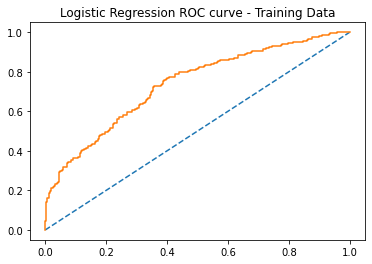

In [189]:
probs_logistic = logistic_model.predict_proba(X_train)
probs_logistic = probs_logistic[:, 1]
auc_train_logistic = roc_auc_score(y_train, probs_logistic)
print('AUC: %.3f' % auc_train_logistic)
logistic_train_fpr, logistic_train_tpr, logistic_train_thresholds = roc_curve(y_train, probs_logistic)
plt.title('Logistic Regression ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_train_fpr, logistic_train_tpr)
plt.show()

In [190]:
confusion_matrix(y_train, ytrain_predict_logistic)

array([[244,  85],
       [118, 163]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


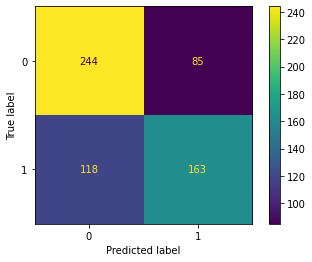

In [191]:
plot_confusion_matrix(logistic_model,X_train,y_train);

In [192]:
print(classification_report(y_train, ytrain_predict_logistic))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



Test Data

In [193]:
logistic_test_acc = logistic_model.score(X_test, y_test)
logistic_test_acc

0.6526717557251909

AUC and ROC for the test data

AUC: 0.717


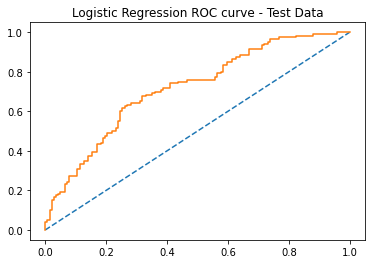

In [194]:
probs_logistic = logistic_model.predict_proba(X_test)
probs_logistic = probs_logistic[:, 1]
auc_test_logistic = roc_auc_score(y_test, probs_logistic)
print('AUC: %.3f' % auc_test_logistic)
logistic_test_fpr, logistic_test_tpr, logistic_test_thresholds = roc_curve(y_test, probs_logistic)
plt.title('Logistic Regression ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_test_fpr, logistic_test_tpr)
plt.show()

In [195]:
confusion_matrix(y_test, ytest_predict_logistic)

array([[109,  33],
       [ 58,  62]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


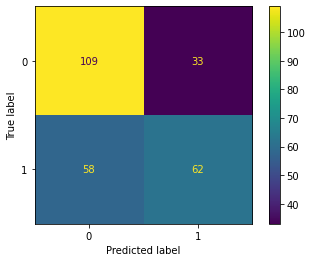

In [196]:
plot_confusion_matrix(logistic_model,X_test,y_test);

In [197]:
print(classification_report(y_test, ytest_predict_logistic))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



Applying GridSearchCV for Logistic Regression

Training Data

In [198]:
logistic_grid_train_acc = best_grid_logistic.score(X_train, y_train)
logistic_grid_train_acc

0.6639344262295082

AUC and ROC for the training data

AUC: 0.731


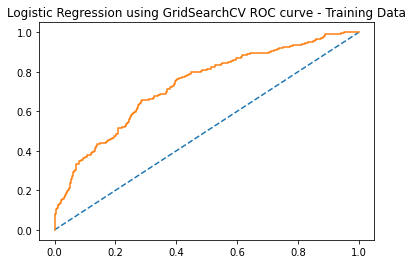

In [199]:
probs_logistic_grid = grid_search_logistic.predict_proba(X_train)
probs_logistic_grid = probs_logistic_grid[:, 1]
auc_train_logistic_grid = roc_auc_score(y_train, probs_logistic_grid)
print('AUC: %.3f' % auc_train_logistic_grid)
logistic_grid_train_fpr, logistic_grid_train_tpr, logistic_grid_train_thresholds = roc_curve(y_train, probs_logistic_grid)
plt.title('Logistic Regression using GridSearchCV ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_grid_train_fpr, logistic_grid_train_tpr)
plt.show()

In [200]:
confusion_matrix(y_train, ytrain_predict_grid)

array([[249,  80],
       [125, 156]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


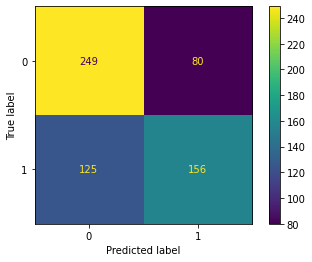

In [201]:
plot_confusion_matrix(best_grid_logistic,X_train,y_train)

In [202]:
print(classification_report(y_train, ytrain_predict_grid))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       329
           1       0.66      0.56      0.60       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



Test Data

In [203]:
logistic_grid_test_acc = best_grid_logistic.score(X_test, y_test)
logistic_grid_test_acc

0.6564885496183206

AUC and ROC for the test data

AUC: 0.715


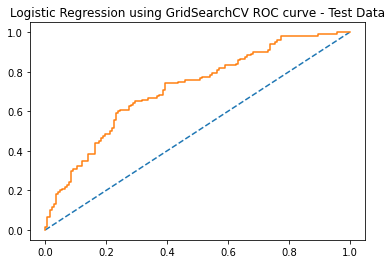

In [204]:
probs_logistic_grid = grid_search_logistic.predict_proba(X_test)
probs_logistic_grid = probs_logistic_grid[:, 1]
auc_test_logistic_grid = roc_auc_score(y_test, probs_logistic_grid)
print('AUC: %.3f' % auc_test_logistic_grid)
logistic_grid_test_fpr, logistic_grid_test_tpr, logistic_grid_test_thresholds = roc_curve(y_test, probs_logistic_grid)
plt.title('Logistic Regression using GridSearchCV ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_grid_test_fpr, logistic_grid_test_tpr)
plt.show()

In [205]:
confusion_matrix(y_test, ytest_predict_grid)

array([[110,  32],
       [ 58,  62]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


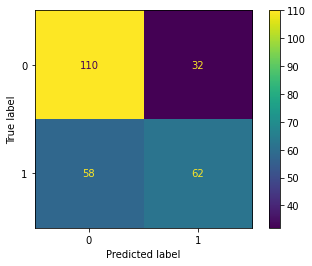

In [206]:
plot_confusion_matrix(best_grid_logistic,X_test,y_test)

In [207]:
print(classification_report(y_test, ytest_predict_grid))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.66      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262



Linear Discriminant Analysis

Training Data

In [208]:
lda_train_acc = lda_model.score(X_train, y_train)
lda_train_acc

0.6639344262295082

AUC: 0.733


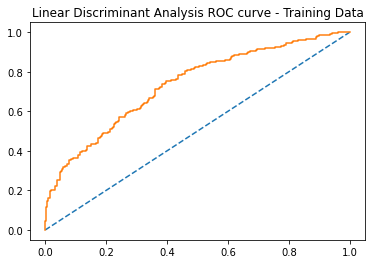

In [209]:
probs_lda = lda_model.predict_proba(X_train)
probs_lda = probs_lda[:, 1]
auc_train_lda = roc_auc_score(y_train, probs_lda)
print('AUC: %.3f' % auc_train_lda)
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs_lda)
plt.title('Linear Discriminant Analysis ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_train_fpr, lda_train_tpr)
plt.show()

In [210]:
confusion_matrix(y_train, ytrain_predict_lda)

array([[243,  86],
       [119, 162]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


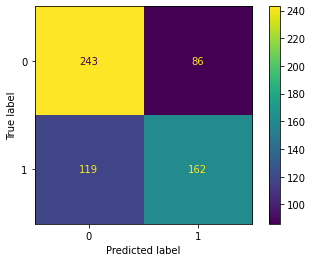

In [211]:
plot_confusion_matrix(lda_model,X_train,y_train)

In [212]:
print(classification_report(y_train, ytrain_predict_lda))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



Test Data

In [213]:
lda_test_acc = lda_model.score(X_test, y_test)
lda_test_acc

0.6412213740458015

AUC: 0.714


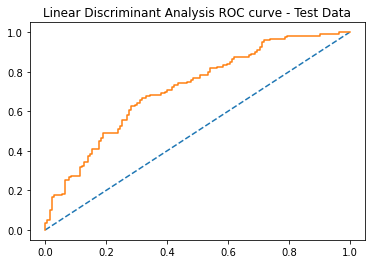

In [214]:
probs_lda = lda_model.predict_proba(X_test)
probs_lda = probs_lda[:, 1]
auc_test_lda = roc_auc_score(y_test, probs_lda)
print('AUC: %.3f' % auc_test_lda)
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs_lda)
plt.title('Linear Discriminant Analysis ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_test_fpr, lda_test_tpr)
plt.show()

In [215]:
confusion_matrix(y_test, ytest_predict_lda)

array([[109,  33],
       [ 61,  59]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


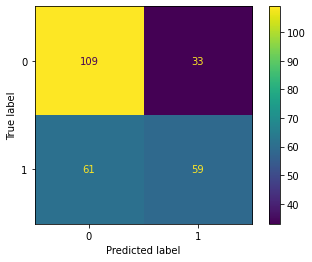

In [216]:
plot_confusion_matrix(lda_model,X_test,y_test)

In [217]:
print(classification_report(y_test, ytest_predict_lda))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262



Compare all the models

In [218]:
logistic_metrics=classification_report(y_train, ytrain_predict_logistic,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_train_f1=round(df.loc["1"][2],2)
logistic_train_recall=round(df.loc["1"][1],2)
logistic_train_precision=round(df.loc["1"][0],2)
print ('logistic_train_precision ',logistic_train_precision)
print ('logistic_train_recall ',logistic_train_recall)
print ('logistic_train_f1 ',logistic_train_f1)
logistic_test_metrics=classification_report(y_test, ytest_predict_logistic,output_dict=True)
df=pd.DataFrame(logistic_test_metrics).transpose()
logistic_test_precision=round(df.loc["1"][0],2)
logistic_test_recall=round(df.loc["1"][1],2)
logistic_test_f1=round(df.loc["1"][2],2)
print ('logistic_test_precision ',logistic_test_precision)
print ('logistic_test_recall ',logistic_test_recall)
print ('logistic_test_f1 ',logistic_test_f1)

logistic_train_precision  0.66
logistic_train_recall  0.58
logistic_train_f1  0.62
logistic_test_precision  0.65
logistic_test_recall  0.52
logistic_test_f1  0.58


In [219]:
logistic_grid_metrics=classification_report(y_train, ytrain_predict_grid,output_dict=True)
df=pd.DataFrame(logistic_grid_metrics).transpose()
logistic_grid_train_f1=round(df.loc["1"][2],2)
logistic_grid_train_recall=round(df.loc["1"][1],2)
logistic_grid_train_precision=round(df.loc["1"][0],2)
print ('logistic_grid_train_precision ',logistic_grid_train_precision)
print ('logistic_grid_train_recall ',logistic_grid_train_recall)
print ('logistic_grid_train_f1 ',logistic_grid_train_f1)
logistic_grid_test_metrics=classification_report(y_test, ytest_predict_grid,output_dict=True)
df=pd.DataFrame(logistic_grid_test_metrics).transpose()
logistic_grid_test_precision=round(df.loc["1"][0],2)
logistic_grid_test_recall=round(df.loc["1"][1],2)
logistic_grid_test_f1=round(df.loc["1"][2],2)
print ('logistic_grid_test_precision ',logistic_grid_test_precision)
print ('logistic_grid_test_recall ',logistic_grid_test_recall)
print ('logistic_grid_test_f1 ',logistic_grid_test_f1)

logistic_grid_train_precision  0.66
logistic_grid_train_recall  0.56
logistic_grid_train_f1  0.6
logistic_grid_test_precision  0.66
logistic_grid_test_recall  0.52
logistic_grid_test_f1  0.58


In [220]:
lda_metrics=classification_report(y_train, ytrain_predict_lda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
lda_test_metrics=classification_report(y_test, ytest_predict_lda,output_dict=True)
df=pd.DataFrame(lda_test_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_train_precision  0.65
lda_train_recall  0.58
lda_train_f1  0.61
lda_test_precision  0.64
lda_test_recall  0.49
lda_test_f1  0.56


In [221]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[logistic_train_acc,auc_train_logistic,logistic_train_recall,logistic_train_precision,logistic_train_f1],
        'Logistic Regression Test':[logistic_train_acc,auc_train_logistic,logistic_test_recall,logistic_test_precision,logistic_test_f1],
       'Logistic Regression Grid Train':[logistic_grid_train_acc,auc_train_logistic_grid,logistic_grid_train_recall,logistic_grid_train_precision,logistic_grid_train_f1],
        'Logistic Regression Grid Test':[logistic_grid_test_acc,auc_test_logistic_grid,logistic_grid_test_recall,logistic_grid_test_precision,logistic_grid_test_f1],
       'LDA Train':[lda_train_acc,auc_train_lda,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,auc_test_lda,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,Logistic Regression Train,Logistic Regression Test,Logistic Regression Grid Train,Logistic Regression Grid Test,LDA Train,LDA Test
Accuracy,0.67,0.67,0.66,0.66,0.66,0.64
AUC,0.74,0.74,0.73,0.72,0.73,0.71
Recall,0.58,0.52,0.56,0.52,0.58,0.49
Precision,0.66,0.65,0.66,0.66,0.65,0.64
F1 Score,0.62,0.58,0.60,0.58,0.61,0.56


ROC curve for the models on training data

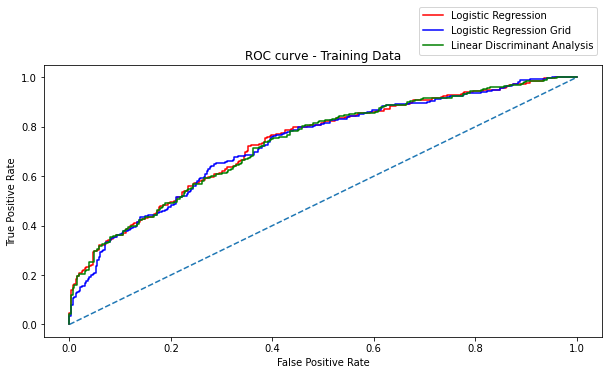

In [222]:
plt.figure(figsize=(10,5))
plt.title('ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_train_fpr, logistic_train_tpr,color='red',label="Logistic Regression")
plt.plot(logistic_grid_train_fpr, logistic_grid_train_tpr,color='blue',label="Logistic Regression Grid")
plt.plot(lda_train_fpr, lda_train_tpr,color='green',label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC curve for the models on test data

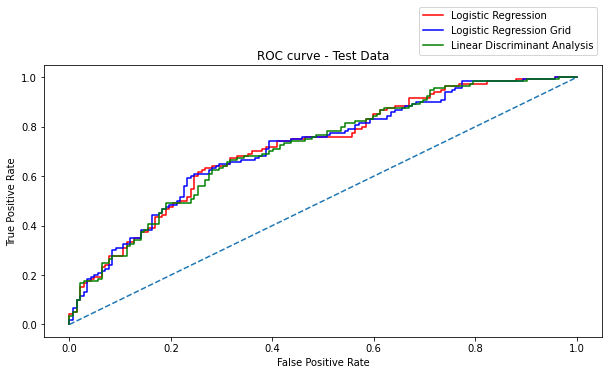

In [223]:
plt.figure(figsize=(10,5))
plt.title('ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_test_fpr, logistic_test_tpr,color='red',label="Logistic Regression")
plt.plot(logistic_grid_test_fpr, logistic_grid_test_tpr,color='blue',label="Logistic Regression Grid")
plt.plot(lda_test_fpr, lda_test_tpr,color='green',label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

2.4 Inference: Basis on these predictions, what are the insights and recommendations.

In [ ]:
Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

df2=pd.read_csv("/content/drive/MyDrive/Great Learning/Predictive Modeling/Project/Holiday_Package.csv")

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

df2.head()

df2.info()

df2.dtypes

df2.shape

df2.isnull().sum()

df2.describe()

df2.drop(["Unnamed: 0"],axis=1,inplace=True)

df2.duplicated().sum()

df2.describe()

df2.shape

Univariate Analysis

def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df2[column], kde=True);
    plt.title("Distribution of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df2[column], orient = "v")
    plt.title("Boxplot of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("Histogram of " + column)
    print("----------------------------------------------------------------------------")
    ax1 = plt.hist(x=df2[column])
    plt.title("Histogram of " + column,fontsize=10)
    plt.xlabel("" + column, fontsize=10)
    plt.show()

df2_num = df2.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns2 = list(df2_num.columns.values)
len(lstnumericcolumns2)

df2_num.head()

df2.skew(axis = 0, skipna = True).sort_values(ascending=False)

for x in lstnumericcolumns2:
    univariateAnalysis_numeric(x,5)

df2.hist(figsize=(12,16),layout=(4,2));

plt.title('Countplot of Holiday package')
sns.countplot(data = df2, x = 'Holliday_Package')

plt.title('Countplot of Foreign')
sns.countplot(data = df2, x = 'foreign')

Bivariate Analysis

corr2 = df2_num.corr(method='pearson')
corr2

plt.figure(figsize=(10,8))
sns.heatmap(corr2, annot=True, fmt = '.2f', cmap = 'Blues')

plt.figure(figsize=(10,5))
plt.title('Countplot of foreign')
sns.countplot(x='foreign',hue='Holliday_Package',data=df2)

Multivariate Analysis

sns.pairplot(df2, diag_kind='kde')
plt.tight_layout()

plt.figure(figsize=(15,5))
plt.title('Boxplot of foreign')
sns.boxplot(data = df2, x='foreign',y='Salary', hue='Holliday_Package')

2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print(feature)
        print(df2[feature].value_counts())
        print('\n')
        

count_no = len(df2[df2['Holliday_Package']=='no'])
count_yes = len(df2[df2['Holliday_Package']=='yes'])
pct_no = count_no / (count_no + count_yes)
print ('Percentage of employees who have not opted for the Holiday Package is', pct_no*100)
pct_yes = count_yes / (count_no + count_yes)
print ('Percentage of employees who have opted for the Holiday Package is', pct_yes*100)

df2 = df2.replace({'yes':1,'no':0})
df2.head()

df2.dtypes

X = df2.drop('Holliday_Package', axis=1)
y = df2['Holliday_Package']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df2['Holliday_Package'])

y_train.value_counts(1)

y_test.value_counts(1)

Logistic Regression

logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
logistic_model.fit(X_train, y_train)

ytrain_predict_logistic = logistic_model.predict(X_train)
ytest_predict_logistic = logistic_model.predict(X_test)

ytest_predict_prob_log = logistic_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log).head()

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, logistic_model.coef_[0][idx]))

Applying GridSearchCV for Logistic Regression

param_grid_logistic = {
    'penalty': ['l2','none'],
    'solver': ['sag','lbfgs','liblinear','saga'],
    'tol': [0.0001,0.00001]
}

logistic = LogisticRegression(max_iter=10000,n_jobs=2)

grid_search_logistic = GridSearchCV(estimator = logistic, param_grid = param_grid_logistic, cv = 3,n_jobs=-1,scoring='f1')

grid_search_logistic.fit(X_train, y_train)
print(grid_search_logistic.best_params_)
best_grid_logistic = grid_search_logistic.best_estimator_
best_grid_logistic

Prediction on the training set

ytrain_predict_grid = best_grid_logistic.predict(X_train)
ytest_predict_grid = best_grid_logistic.predict(X_test)

ytest_predict_prob=best_grid_logistic.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_grid_logistic.coef_[0][idx]))

Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis(n_components = None, priors = None, shrinkage = None, solver='svd',store_covariance = False, tol = 0.0001)
lda_model.fit(X_train, y_train)
lda_model

ytrain_predict_lda = lda_model.predict(X_train)
ytest_predict_lda = lda_model.predict(X_test)

ytest_predict_prob_lda = lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lda).head()

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lda_model.coef_[0][idx]))

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare both the models and write inference which model is best/optimized.

Logistic Regression

Training Data

logistic_train_acc = logistic_model.score(X_train, y_train)
logistic_train_acc

AUC and ROC for the training data

probs_logistic = logistic_model.predict_proba(X_train)
probs_logistic = probs_logistic[:, 1]
auc_train_logistic = roc_auc_score(y_train, probs_logistic)
print('AUC: %.3f' % auc_train_logistic)
logistic_train_fpr, logistic_train_tpr, logistic_train_thresholds = roc_curve(y_train, probs_logistic)
plt.title('Logistic Regression ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_train_fpr, logistic_train_tpr)
plt.show()

confusion_matrix(y_train, ytrain_predict_logistic)

plot_confusion_matrix(logistic_model,X_train,y_train);

print(classification_report(y_train, ytrain_predict_logistic))

Test Data

logistic_test_acc = logistic_model.score(X_test, y_test)
logistic_test_acc

AUC and ROC for the test data

probs_logistic = logistic_model.predict_proba(X_test)
probs_logistic = probs_logistic[:, 1]
auc_test_logistic = roc_auc_score(y_test, probs_logistic)
print('AUC: %.3f' % auc_test_logistic)
logistic_test_fpr, logistic_test_tpr, logistic_test_thresholds = roc_curve(y_test, probs_logistic)
plt.title('Logistic Regression ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_test_fpr, logistic_test_tpr)
plt.show()

confusion_matrix(y_test, ytest_predict_logistic)

plot_confusion_matrix(logistic_model,X_test,y_test);

print(classification_report(y_test, ytest_predict_logistic))

Applying GridSearchCV for Logistic Regression

Training Data

logistic_grid_train_acc = best_grid_logistic.score(X_train, y_train)
logistic_grid_train_acc

AUC and ROC for the training data

probs_logistic_grid = grid_search_logistic.predict_proba(X_train)
probs_logistic_grid = probs_logistic_grid[:, 1]
auc_train_logistic_grid = roc_auc_score(y_train, probs_logistic_grid)
print('AUC: %.3f' % auc_train_logistic_grid)
logistic_grid_train_fpr, logistic_grid_train_tpr, logistic_grid_train_thresholds = roc_curve(y_train, probs_logistic_grid)
plt.title('Logistic Regression using GridSearchCV ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_grid_train_fpr, logistic_grid_train_tpr)
plt.show()

confusion_matrix(y_train, ytrain_predict_grid)

plot_confusion_matrix(best_grid_logistic,X_train,y_train)

print(classification_report(y_train, ytrain_predict_grid))

Test Data

logistic_grid_test_acc = best_grid_logistic.score(X_test, y_test)
logistic_grid_test_acc

AUC and ROC for the test data

probs_logistic_grid = grid_search_logistic.predict_proba(X_test)
probs_logistic_grid = probs_logistic_grid[:, 1]
auc_test_logistic_grid = roc_auc_score(y_test, probs_logistic_grid)
print('AUC: %.3f' % auc_test_logistic_grid)
logistic_grid_test_fpr, logistic_grid_test_tpr, logistic_grid_test_thresholds = roc_curve(y_test, probs_logistic_grid)
plt.title('Logistic Regression using GridSearchCV ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_grid_test_fpr, logistic_grid_test_tpr)
plt.show()

confusion_matrix(y_test, ytest_predict_grid)

plot_confusion_matrix(best_grid_logistic,X_test,y_test)

print(classification_report(y_test, ytest_predict_grid))

Linear Discriminant Analysis

Training Data

lda_train_acc = lda_model.score(X_train, y_train)
lda_train_acc

probs_lda = lda_model.predict_proba(X_train)
probs_lda = probs_lda[:, 1]
auc_train_lda = roc_auc_score(y_train, probs_lda)
print('AUC: %.3f' % auc_train_lda)
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs_lda)
plt.title('Linear Discriminant Analysis ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_train_fpr, lda_train_tpr)
plt.show()

confusion_matrix(y_train, ytrain_predict_lda)

plot_confusion_matrix(lda_model,X_train,y_train)

print(classification_report(y_train, ytrain_predict_lda))

Test Data

lda_test_acc = lda_model.score(X_test, y_test)
lda_test_acc

probs_lda = lda_model.predict_proba(X_test)
probs_lda = probs_lda[:, 1]
auc_test_lda = roc_auc_score(y_test, probs_lda)
print('AUC: %.3f' % auc_test_lda)
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs_lda)
plt.title('Linear Discriminant Analysis ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_test_fpr, lda_test_tpr)
plt.show()

confusion_matrix(y_test, ytest_predict_lda)

plot_confusion_matrix(lda_model,X_test,y_test)

print(classification_report(y_test, ytest_predict_lda))

Compare all the models

logistic_metrics=classification_report(y_train, ytrain_predict_logistic,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_train_f1=round(df.loc["1"][2],2)
logistic_train_recall=round(df.loc["1"][1],2)
logistic_train_precision=round(df.loc["1"][0],2)
print ('logistic_train_precision ',logistic_train_precision)
print ('logistic_train_recall ',logistic_train_recall)
print ('logistic_train_f1 ',logistic_train_f1)
logistic_test_metrics=classification_report(y_test, ytest_predict_logistic,output_dict=True)
df=pd.DataFrame(logistic_test_metrics).transpose()
logistic_test_precision=round(df.loc["1"][0],2)
logistic_test_recall=round(df.loc["1"][1],2)
logistic_test_f1=round(df.loc["1"][2],2)
print ('logistic_test_precision ',logistic_test_precision)
print ('logistic_test_recall ',logistic_test_recall)
print ('logistic_test_f1 ',logistic_test_f1)

logistic_grid_metrics=classification_report(y_train, ytrain_predict_grid,output_dict=True)
df=pd.DataFrame(logistic_grid_metrics).transpose()
logistic_grid_train_f1=round(df.loc["1"][2],2)
logistic_grid_train_recall=round(df.loc["1"][1],2)
logistic_grid_train_precision=round(df.loc["1"][0],2)
print ('logistic_grid_train_precision ',logistic_grid_train_precision)
print ('logistic_grid_train_recall ',logistic_grid_train_recall)
print ('logistic_grid_train_f1 ',logistic_grid_train_f1)
logistic_grid_test_metrics=classification_report(y_test, ytest_predict_grid,output_dict=True)
df=pd.DataFrame(logistic_grid_test_metrics).transpose()
logistic_grid_test_precision=round(df.loc["1"][0],2)
logistic_grid_test_recall=round(df.loc["1"][1],2)
logistic_grid_test_f1=round(df.loc["1"][2],2)
print ('logistic_grid_test_precision ',logistic_grid_test_precision)
print ('logistic_grid_test_recall ',logistic_grid_test_recall)
print ('logistic_grid_test_f1 ',logistic_grid_test_f1)

lda_metrics=classification_report(y_train, ytrain_predict_lda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
lda_test_metrics=classification_report(y_test, ytest_predict_lda,output_dict=True)
df=pd.DataFrame(lda_test_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[logistic_train_acc,auc_train_logistic,logistic_train_recall,logistic_train_precision,logistic_train_f1],
        'Logistic Regression Test':[logistic_train_acc,auc_train_logistic,logistic_test_recall,logistic_test_precision,logistic_test_f1],
       'Logistic Regression Grid Train':[logistic_grid_train_acc,auc_train_logistic_grid,logistic_grid_train_recall,logistic_grid_train_precision,logistic_grid_train_f1],
        'Logistic Regression Grid Test':[logistic_grid_test_acc,auc_test_logistic_grid,logistic_grid_test_recall,logistic_grid_test_precision,logistic_grid_test_f1],
       'LDA Train':[lda_train_acc,auc_train_lda,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,auc_test_lda,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

ROC curve for the models on training data

plt.figure(figsize=(10,5))
plt.title('ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_train_fpr, logistic_train_tpr,color='red',label="Logistic Regression")
plt.plot(logistic_grid_train_fpr, logistic_grid_train_tpr,color='blue',label="Logistic Regression Grid")
plt.plot(lda_train_fpr, lda_train_tpr,color='green',label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC curve for the models on test data

plt.figure(figsize=(10,5))
plt.title('ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_test_fpr, logistic_test_tpr,color='red',label="Logistic Regression")
plt.plot(logistic_grid_test_fpr, logistic_grid_test_tpr,color='blue',label="Logistic Regression Grid")
plt.plot(lda_test_fpr, lda_test_tpr,color='green',label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

2.4 Inference: Basis on these predictions, what are the insights and recommendations.

